## Analiza danych i zbudowanie modeli predykcyjnych

### Piotr Mariusz Kozikowski

---

Na potrzeby zrealizowanej analizy danych, zdecydowano się na wybór zbioru danych dotyczącego przejazdów żółtych taksówek (ang. *yellow taxis*) w Nowym Jorku, obejmującego I kwartał 2024 r. 

#### Import niezbędnych bibliotek do wczytania danych, przeprowadzenia analizy danych i szacowania modeli predykcyjnych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import plot_utils as pu
import data_utils as du

#### Wczytanie plików w formacie Parquet do ramek danych Pandas

In [2]:
# Wczytanie plików ze zbiorami danych w formacie Parquet
file_name = "data/yellow_tripdata_2024-xx.parquet"

# Utworzenie ramek danych poprzez wczytanie wybranych plików z danymi
df_1 = pd.read_parquet(file_name.replace("xx", "01"))
df_2 = pd.read_parquet(file_name.replace("xx", "02"))
df_3 = pd.read_parquet(file_name.replace("xx", "03"))

# Połączenie powstałych ramek danych w jedną ramkę
df = pd.concat([df_1, df_2, df_3])

# Zresetowanie indeksu w ramce danych w celu zachowania jednolitości
df.reset_index(inplace=True, drop=True)

In [3]:
# Wyświetlenie pierwszych pięciu wierszy we wczytanej ramce danych
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
# Wyświetlenie ostatnich pięciu wierszy we wczytanej ramce danych
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
9554773,2,2024-03-31 23:16:45,2024-03-31 23:29:20,NaN,4.27,NaN,None,130,218,0,14.27,0.0,0.5,0.00,0.0,1.0,15.77,NaN,NaN
9554774,1,2024-03-31 23:29:28,2024-03-31 23:43:47,NaN,0.00,NaN,None,79,100,0,14.00,1.0,0.5,3.80,0.0,1.0,24.80,NaN,NaN
9554775,2,2024-03-31 23:15:00,2024-03-31 23:47:29,NaN,6.44,NaN,None,63,181,0,30.00,0.0,0.5,0.00,0.0,1.0,31.50,NaN,NaN
9554776,2,2024-03-31 23:27:53,2024-03-31 23:45:44,NaN,3.88,NaN,None,161,148,0,22.32,0.0,0.5,5.26,0.0,1.0,31.58,NaN,NaN
9554777,2,2024-03-31 23:10:50,2024-03-31 23:31:59,NaN,7.39,NaN,None,95,7,0,31.47,0.0,0.5,0.00,0.0,1.0,32.97,NaN,NaN


In [5]:
vendor_names = {1: 'CMT', 2: 'CM', 6: 'MT', 7: 'Helix'}
df['VendorName'] = df['VendorID'].replace(vendor_names)

In [6]:
print(df['VendorName'].unique())

['CM' 'CMT' 'MT']


#### Statystyki opisowe i podstawowe informacje o analizowanym zbiorze danych

In [7]:
# Wyświetlenie informacji o nazwach kolumn oraz ich typach danych w ramce danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [8]:
numeric_col_list = [col for col in df.columns if col not in ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
                                                             'payment_type']]

In [9]:
# Wyświetlenie podstawowych statystyk opisowych zbioru danych
df.loc[:, numeric_col_list].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,9554778,9554778,8.802816e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,8.802816e+06,8.802816e+06
mean,2024-02-17 17:20:27.204719,2024-02-17 17:36:34.800669,1.334410e+00,4.042286e+00,1.832512e+01,1.416683e+00,4.831806e-01,3.271080e+00,5.263560e-01,9.750437e-01,2.686540e+01,2.258098e+00,1.377972e-01
min,2002-12-31 22:17:10,2002-12-31 22:42:24,0.000000e+00,0.000000e+00,-9.990000e+02,-7.500000e+00,-5.000000e-01,-3.000000e+02,-8.430000e+01,-1.000000e+00,-1.000000e+03,-2.500000e+00,-1.750000e+00
25%,2024-01-26 09:55:41.250000,2024-01-26 10:12:00.250000,1.000000e+00,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.547000e+01,2.500000e+00,0.000000e+00
50%,2024-02-18 15:38:32.500000,2024-02-18 15:55:02.500000,1.000000e+00,1.700000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.650000e+00,0.000000e+00,1.000000e+00,2.020000e+01,2.500000e+00,0.000000e+00
75%,2024-03-11 11:59:11.750000,2024-03-11 12:16:17,1.000000e+00,3.190000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.892000e+01,2.500000e+00,0.000000e+00
max,2024-04-01 00:34:55,2024-04-02 18:08:46,9.000000e+00,3.127223e+05,9.792000e+03,1.425000e+01,3.584000e+01,9.999900e+02,1.630000e+02,1.000000e+00,9.792000e+03,2.500000e+00,1.750000e+00
std,NaN,NaN,8.409249e-01,2.654783e+02,1.854497e+01,1.804238e+00,1.190495e-01,3.927616e+00,2.124506e+00,2.203429e-01,2.305019e+01,8.254055e-01,4.831947e-01


**Komentarz:** Wśród wartości w kolumnie *fare_amount* pojawiają wartości ujemne, które odpowiadają zwrotom kosztów przejazdu pasażerom ze względu na różne przyczyny (np. odwołanie przejazdu, niepoprawna pobrana kwota). Analogicznie w przypadku kolumn *extra*, *mta_tax*, *tip_amount*, *tolls_amount*, *improvement_surcharge* i *congestion_surcharge*. Stąd też zdecydowano, aby kwoty te zamienić na wartości dodatnie poprzez użycie wartości bezwzględnej. 

In [10]:
neg_val_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

for col in neg_val_cols:
    df[col] = df[col].abs()

In [11]:
# Wyświetlenie podstawowych statystyk opisowych zbioru danych po zamianie wartości
df.loc[:, numeric_col_list].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,9554778,9554778,8.802816e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06,8.802816e+06,8.802816e+06
mean,2024-02-17 17:20:27.204719,2024-02-17 17:36:34.800669,1.334410e+00,4.042286e+00,1.883008e+01,1.439786e+00,4.949449e-01,3.271626e+00,5.396723e-01,9.993000e-01,2.686540e+01,2.312122e+00,1.442658e-01
min,2002-12-31 22:17:10,2002-12-31 22:42:24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+03,0.000000e+00,0.000000e+00
25%,2024-01-26 09:55:41.250000,2024-01-26 10:12:00.250000,1.000000e+00,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.547000e+01,2.500000e+00,0.000000e+00
50%,2024-02-18 15:38:32.500000,2024-02-18 15:55:02.500000,1.000000e+00,1.700000e+00,1.302000e+01,1.000000e+00,5.000000e-01,2.650000e+00,0.000000e+00,1.000000e+00,2.020000e+01,2.500000e+00,0.000000e+00
75%,2024-03-11 11:59:11.750000,2024-03-11 12:16:17,1.000000e+00,3.190000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.892000e+01,2.500000e+00,0.000000e+00
max,2024-04-01 00:34:55,2024-04-02 18:08:46,9.000000e+00,3.127223e+05,9.792000e+03,1.425000e+01,3.584000e+01,9.999900e+02,1.630000e+02,1.000000e+00,9.792000e+03,2.500000e+00,1.750000e+00
std,NaN,NaN,8.409249e-01,2.654783e+02,1.803202e+01,1.785856e+00,5.163190e-02,3.927161e+00,2.121162e+00,2.570371e-02,2.305019e+01,6.590868e-01,4.813030e-01


#### Utworzenie pomocniczych kolumn zawierających szczegółowe informacje o datach odbioru i wysadzenia pasażerów

In [12]:
# Utworzenie pomocniczych kolumn zawierających rozdzielone informacje o czasie w oparciu
# o daty odbioru i wysadzenia pasażerów
for col_name in ['pickup', 'dropoff']:
    df[f'{col_name}_day'] = df[f'tpep_{col_name}_datetime'].dt.day
    df[f'{col_name}_weekday'] = df[f'tpep_{col_name}_datetime'].dt.dayofweek
    df[f'{col_name}_month'] = df[f'tpep_{col_name}_datetime'].dt.month
    df[f'{col_name}_year'] = df[f'tpep_{col_name}_datetime'].dt.year
    df[f'{col_name}_hour'] = df[f'tpep_{col_name}_datetime'].dt.hour
    df[f'{col_name}_minute'] = df[f'tpep_{col_name}_datetime'].dt.minute
    df[f'{col_name}_second'] = df[f'tpep_{col_name}_datetime'].dt.second

#### Sprawdzenie, czy w zbiorze danych występują wiersze niemieszczące się w wybranym zakresie czasowym

In [13]:
# Wyszukanie wszystkich wierszy zawierających dane sprzed badanego okresu
df[(df.pickup_year <= 2023) & (df.dropoff_year < 2024)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_minute,pickup_second,dropoff_day,dropoff_weekday,dropoff_month,dropoff_year,dropoff_hour,dropoff_minute,dropoff_second
369,2,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,N,90,68,1,...,23,39,17,31,6,12,2023,23,42,0
753,2,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,N,246,246,2,...,23,41,2,31,6,12,2023,23,48,3
3176,2,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,N,68,137,1,...,23,47,28,31,6,12,2023,23,57,7
10915,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,...,23,58,40,2,4,1,2009,0,1,40
53119,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,...,22,59,39,31,1,12,2002,23,5,41
53120,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,...,22,59,39,31,1,12,2002,23,5,41
1230169,2,2009-01-01 23:30:39,2009-01-02 00:01:39,1.0,10.99,1.0,N,237,264,2,...,23,30,39,2,4,1,2009,0,1,39
2558056,2,2009-01-01 00:24:09,2009-01-01 01:13:00,2.0,10.88,1.0,N,138,264,2,...,0,24,9,1,3,1,2009,1,13,0
3145907,2,2008-12-31 22:52:49,2008-12-31 23:04:09,1.0,1.62,1.0,N,141,211,1,...,22,52,49,31,2,12,2008,23,4,9
3863477,2,2009-01-01 00:02:13,2009-01-01 00:48:28,1.0,0.57,1.0,N,79,148,1,...,0,2,13,1,3,1,2009,0,48,28


In [14]:
# Wyświetlenie informacji o liczności wierszy spełniających dany warunek
print("Liczba wierszy dotyczących przejazdów do roku 2009 włącznie:", (df.pickup_year <= 2009).sum())
print("Liczba wierszy dotyczących przejazdów w roku 2023, które nie kończyły się w roku 2024:", ((df.pickup_year >= 2023) & (df.dropoff_year < 2024)).sum())

Liczba wierszy dotyczących przejazdów do roku 2009 włącznie: 9
Liczba wierszy dotyczących przejazdów w roku 2023, które nie kończyły się w roku 2024: 3


**Komentarz:** Wśród zebranych danych dotyczących przejazdów taksówkami w Nowym Jorku w miesiącach **styczeń - marzec 2024 r.** pojawiły się również dane
dotyczące przejazdów w latach **2002, 2008 i 2009** (*łącznie: 9*). Ponadto, w zbiorze danych znajdują się także informacje o przejazdach w ostatni dzień roku **2023**, czyli w Sylwestra, również te kończące się tego samego dnia (*łącznie: 3*). W związku z tym, zdecydowano się usunąć wspomniane wiersze, aby nie zaburzały dalszej części analizy.

In [15]:
# Usunięcie wierszy zawierających przejazdy sprzed 2024 r. (poza tymi z przełomu lat 2023 i 2024)
df = df[~((df.pickup_year <= 2023) & (df.dropoff_year < 2024))]

# Weryfikacja poczynionych zmian
print("Pierwsza data odbioru pasażera w zbiorze danych:", df.tpep_pickup_datetime.min())
print("Pierwsza data wysadzenia pasażera w zbiorze danych:", df.tpep_dropoff_datetime.min())

Pierwsza data odbioru pasażera w zbiorze danych: 2023-12-31 23:49:12
Pierwsza data wysadzenia pasażera w zbiorze danych: 2024-01-01 00:00:28


In [16]:
# Wyświetlenie liczby wszystkich wartości pustych w kolumnach ramki danych
print(df.loc[:, numeric_col_list].isna().sum())

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          751962
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     751962
Airport_fee              751962
VendorName                    0
dtype: int64


**Komentarz:** Wśród analizowanych danych znajduje się łącznie **751962** pustych wartości w kolumnach *passenger_count*, *RatecodeID* oraz *store_and_fwd_flag*.

In [17]:
# Wyświetlenie liczby powtarzających się (zduplikowanych) wierszy
print(f"Wśród analizowanych danych znajduje się {df.duplicated().sum()} zduplikowany wiersz.")

Wśród analizowanych danych znajduje się 1 zduplikowany wiersz.


#### Wykresy wizualizujące dane

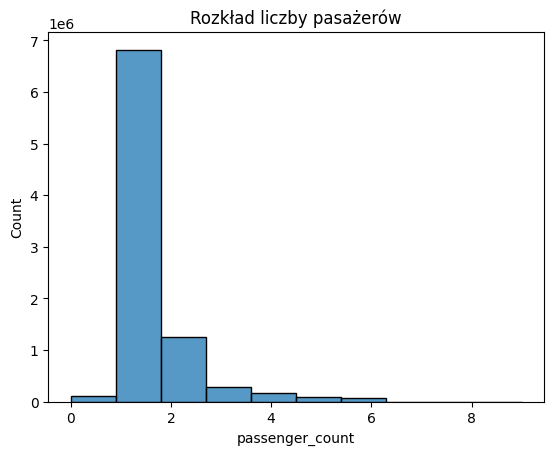

In [18]:
pu.histogram(df=df, col='passenger_count', title='Rozkład liczby pasażerów', bins=10, log_scale=False)

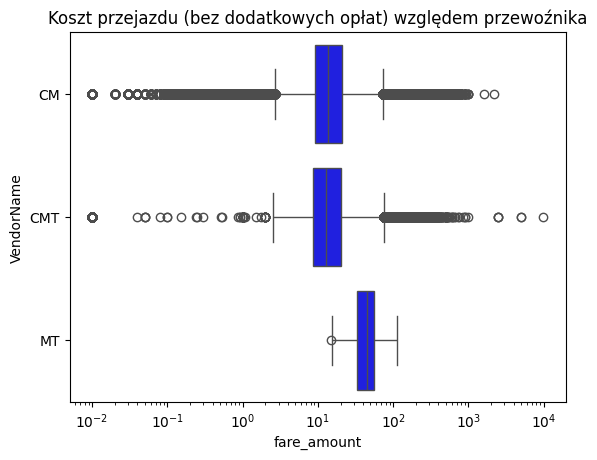

In [19]:
pu.boxplot(df, x='fare_amount', y='VendorName', title='Koszt przejazdu (bez dodatkowych opłat) względem przewoźnika', log_scale=True)

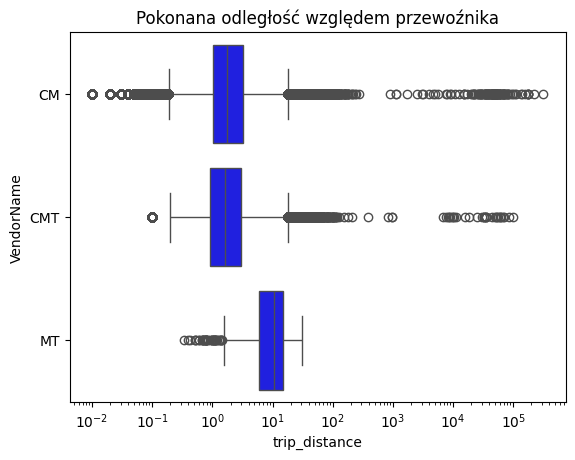

In [20]:
pu.boxplot(df, x='trip_distance', y='VendorName', title='Pokonana odległość względem przewoźnika', log_scale=True)

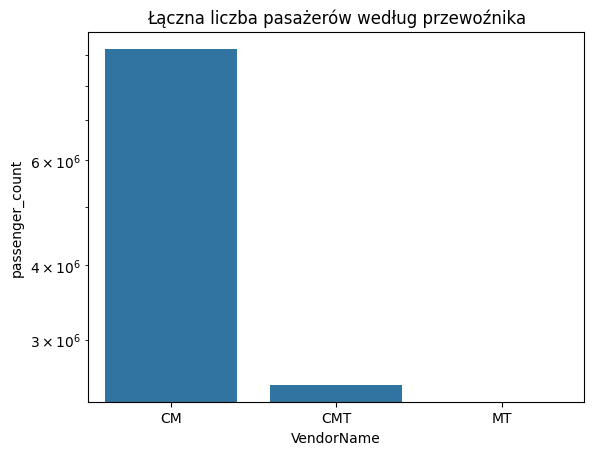

In [22]:
passenger_sum = df.groupby('VendorName', as_index=False)['passenger_count'].sum()
pu.barplot(passenger_sum, x='VendorName', y='passenger_count', title='Łączna liczba pasażerów według przewoźnika', log_y=True)

In [23]:
passenger_sum

,VendorName,passenger_count
0,CM,9227946.0
1,CMT,2518604.0
2,MT,0.0


In [24]:
df[df['VendorName'] == 'MT']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_minute,pickup_second,dropoff_day,dropoff_weekday,dropoff_month,dropoff_year,dropoff_hour,dropoff_minute,dropoff_second
2827331,6,2024-01-01 02:01:50,2024-01-01 02:01:39,NaN,7.46,NaN,None,265,197,0,...,2,1,50,1,0,1,2024,2,1,39
2828143,6,2024-01-01 03:01:46,2024-01-01 03:01:39,NaN,7.65,NaN,None,265,62,0,...,3,1,46,1,0,1,2024,3,1,39
2831527,6,2024-01-01 09:01:16,2024-01-01 09:01:49,NaN,20.16,NaN,None,265,151,0,...,9,1,16,1,0,1,2024,9,1,49
2831545,6,2024-01-01 09:01:55,2024-01-01 10:01:04,NaN,15.50,NaN,None,265,151,0,...,9,1,55,1,0,1,2024,10,1,4
2831631,6,2024-01-01 10:01:43,2024-01-01 10:01:48,NaN,17.83,NaN,None,265,191,0,...,10,1,43,1,0,1,2024,10,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547717,6,2024-03-31 13:03:18,2024-03-31 13:03:07,NaN,15.12,NaN,None,265,89,0,...,13,3,18,31,6,3,2024,13,3,7
9547980,6,2024-03-31 13:03:56,2024-03-31 14:03:30,NaN,12.74,NaN,None,265,131,0,...,13,3,56,31,6,3,2024,14,3,30
9547981,6,2024-03-31 13:03:51,2024-03-31 13:03:34,NaN,1.58,NaN,None,265,148,0,...,13,3,51,31,6,3,2024,13,3,34
9549999,6,2024-03-31 16:03:53,2024-03-31 16:03:51,NaN,13.01,NaN,None,265,216,0,...,16,3,53,31,6,3,2024,16,3,51


In [25]:
df['passenger_count'] = df.apply(
    lambda row: du.estimate_passenger_count(df, row, 'MT'),
    axis=1
)
passenger_sum = df.groupby('VendorName', as_index=False)['passenger_count'].sum()
passenger_sum

,VendorName,passenger_count
0,CM,9.227946e+06
1,CMT,2.518604e+06
2,MT,9.787498e+02


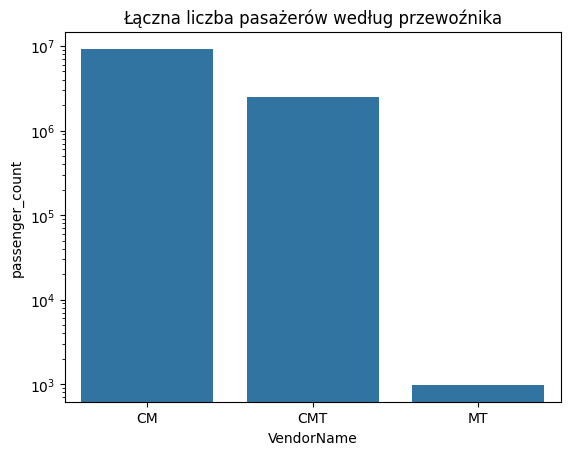

In [26]:
pu.barplot(passenger_sum, x='VendorName', y='passenger_count', title='Łączna liczba pasażerów według przewoźnika', log_y=True)